In [610]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

#read the data
df = pd.read_csv("dataset.csv", parse_dates=[['day','month','year','hour']])
df.shape[:]

(43824, 10)

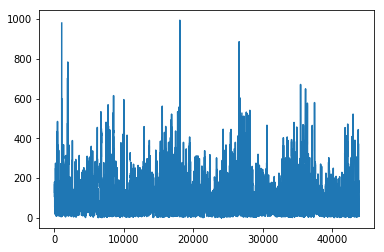

In [611]:
v=df['pm2.5'].values
plt.plot(v)
plt.savefig("pm")

/home/pawan/.local/lib/python3.6/site-packages/matplotlib/legend.py:1266: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "


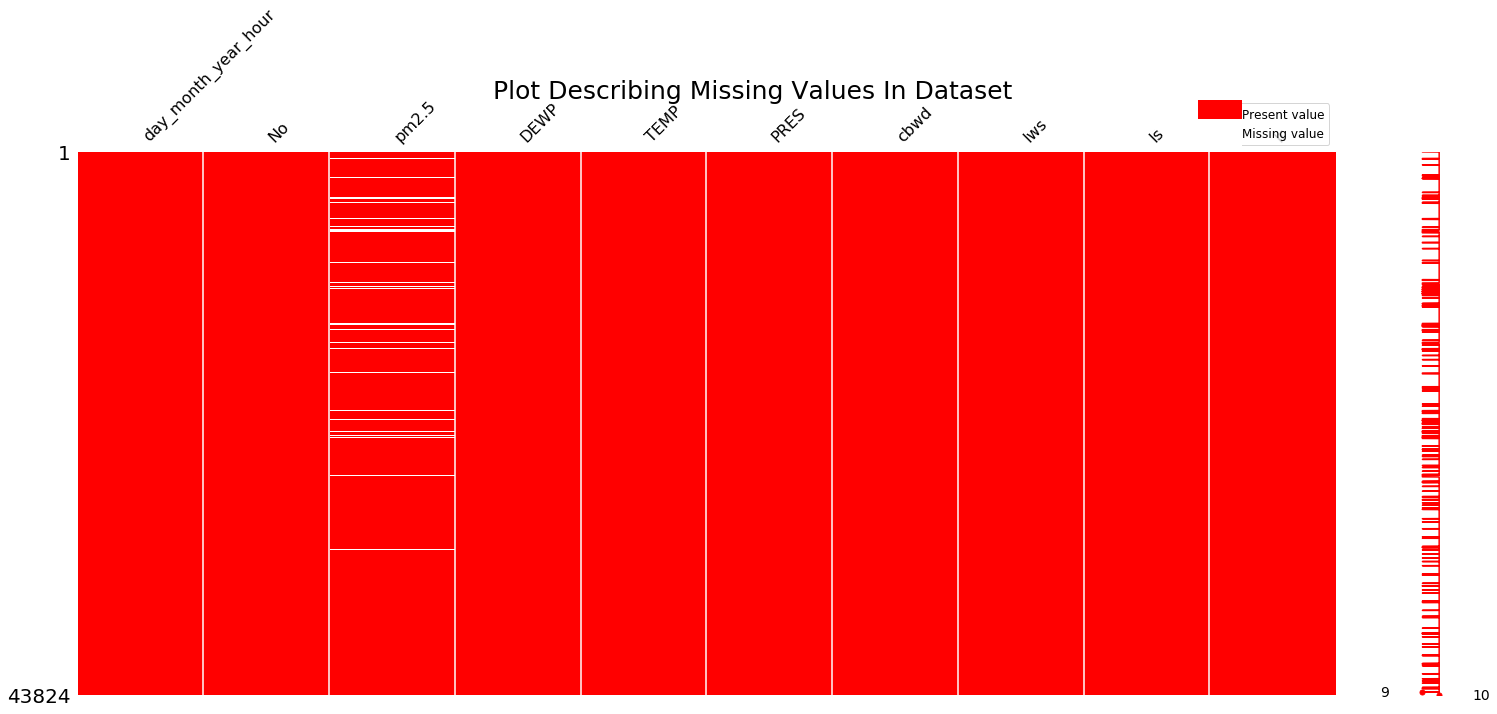

In [664]:
import matplotlib.patches as mpatches
from matplotlib.font_manager import FontProperties
import missingno as msn
import seaborn as sns

fontP = FontProperties()
fontP.set_size('large')
# legend([plot1], "title", prop=fontP)
# Visualising data for missing value
#White spaces shows the missing value & Black for the values present

fig = msn.matrix(df,color=(1, 0, 0))

red_patch = mpatches.Patch(color='red', label='Present value',linewidth=20,antialiased=True)
yellow_patch = mpatches.Patch(color='white', label='Missing value',linewidth=20,antialiased=True)
plt.legend(fig,handles=[red_patch,yellow_patch],prop=fontP,loc='upper right', bbox_to_anchor=(1, 1.1))

plt.suptitle('Plot Describing Missing Values In Dataset', fontsize=25)
#plt.xlabel("Features",fontsize=20)
#plt.ylabel("Customer ID",fontsize=20)
plt.autoscale(enable=True,axis='both')
plt.savefig('Nan value.png')

In [613]:
df.dtypes

day_month_year_hour     object
No                       int64
pm2.5                  float64
DEWP                     int64
TEMP                   float64
PRES                   float64
cbwd                    object
Iws                    float64
Is                       int64
Ir                       int64
dtype: object

In [614]:
df['day_month_year_hour'] = pd.to_datetime(df.day_month_year_hour , format = '%d %m %Y %H')
data = df.drop(['day_month_year_hour'], axis=1)
data.index = df.day_month_year_hour
data = data.drop(['No'],axis=1)

In [615]:
data.head(n=5)

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
day_month_year_hour,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [616]:
i=1
for x in pd.isnull(data['pm2.5']).values:
    if x:
        i+=1
print(i)

2068


In [617]:
np.unique(pd.isnull(data['pm2.5']).values,return_counts=True)

(array([False,  True]), array([41757,  2067]))

In [618]:
data = data.fillna(method='bfill')

In [619]:
data[data.isnull().any(axis=1)].shape[0]

0

In [620]:
data.head(n=5)

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
day_month_year_hour,,,,,,,,
2010-01-01 00:00:00,129.0,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,129.0,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,129.0,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,129.0,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,129.0,-20,-12.0,1018.0,NW,12.97,0,0


In [621]:
le =preprocessing.LabelEncoder()
data['cbwd'] = le.fit_transform(data['cbwd'])

In [622]:
data.head(n=5)

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
day_month_year_hour,,,,,,,,
2010-01-01 00:00:00,129.0,-21,-11.0,1021.0,1,1.79,0,0
2010-01-01 01:00:00,129.0,-21,-12.0,1020.0,1,4.92,0,0
2010-01-01 02:00:00,129.0,-21,-11.0,1019.0,1,6.71,0,0
2010-01-01 03:00:00,129.0,-21,-14.0,1019.0,1,9.84,0,0
2010-01-01 04:00:00,129.0,-20,-12.0,1018.0,1,12.97,0,0


In [623]:
# create a differenced series
def difference(dataset, interval):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return pd.Series(diff)

In [624]:
Dpm=difference(data['pm2.5'],1)

In [625]:
Dpm.shape[:]

(43823,)

In [626]:
# invert differenced forecast
# def inverse_difference(last_ob, value):
# 	return value + last_ob
data.shape[:]

(43824, 8)

In [627]:
temp = data['pm2.5'].copy()

In [628]:
s2 = pd.Series(list([129]))
p=s2.append(Dpm,ignore_index=True)
data = data.drop(['pm2.5'], axis =1)

In [629]:
data['pm2.5'] = p.values

In [630]:
data.head(n=5)

,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,pm2.5
day_month_year_hour,,,,,,,,
2010-01-01 00:00:00,-21,-11.0,1021.0,1,1.79,0,0,129.0
2010-01-01 01:00:00,-21,-12.0,1020.0,1,4.92,0,0,0.0
2010-01-01 02:00:00,-21,-11.0,1019.0,1,6.71,0,0,0.0
2010-01-01 03:00:00,-21,-14.0,1019.0,1,9.84,0,0,0.0
2010-01-01 04:00:00,-20,-12.0,1018.0,1,12.97,0,0,0.0


In [631]:
#checking stationarity
from statsmodels.tsa.vector_ar.vecm import coint_johansen
#since the test works for only 12 variables, I have randomly dropped
#in the next iteration, I would drop another and check the eigenvalues
johan_test_temp = data.drop(['pm2.5'], axis=1)
coint_johansen(data,-1,1).eig

array([3.33556946e-01, 2.14781887e-01, 5.71255156e-02, 4.86348230e-02,
       4.28205441e-02, 2.91791015e-02, 1.45018833e-03, 2.12063995e-09])

In [632]:
data.dtypes

DEWP       int64
TEMP     float64
PRES     float64
cbwd       int64
Iws      float64
Is         int64
Ir         int64
pm2.5    float64
dtype: object

In [633]:
np.unique(data.cbwd.values)

array([0, 1, 2, 3])

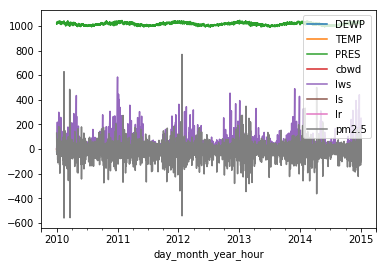

In [634]:
data.plot()
plt.savefig('u')

In [635]:
# train = data[:int(0.9*(len(data)))]
# valid = data[int(0.9*(len(data))):]

# #fit the model
# from statsmodels.tsa.vector_ar.var_model import VAR
# from statsmodels.tsa.arima_model as arima

# model = VAR(endog=train,)
# model_fit = model.fit()

# # make prediction on validation
# prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


In [663]:
train = data[:int(0.9*(len(data)))]
valid = data[int(0.9*(len(data))):]

#fit the model
import statsmodels.tsa.arima_model as arima

model = arima.ARIMA(endog=train,order=(1,1,1))
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

In [636]:
s1 = np.array(temp[int(0.9*(len(temp)))-1 : -1])
s2 = np.array(prediction[:,-1])

In [637]:
prediction.shape[:]

(4383, 8)

In [638]:
print(s1.shape[:])
print(s2.shape[:])

(4383,)
(4383,)


In [639]:
prediction[:,-1] = np.add(s1,s2)

In [640]:
#converting predictions to dataframe
cols = data.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(8):
    for i in range(0, len(prediction)):
        pred.iloc[i][j] = prediction[i][j]

In [641]:
pred.head(n=5)

,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,pm2.5
0,19.9983,21.9694,1004,2.27446,0.758592,0.00725282,0.938293,58.2408
1,19.9414,22.0351,1004.04,2.0252,0.68014,0.0116033,0.888059,52.1861
2,19.8565,22.136,1004.11,1.93729,0.661208,0.0147224,0.845097,32.5726
3,19.7617,22.2471,1004.18,1.90652,0.682234,0.0171422,0.807107,49.3348
4,19.6645,22.3589,1004.25,1.89625,0.732229,0.0190719,0.772962,55.2615


In [642]:
temp[int(0.9*(len(temp)))-1 : -1].head(n=5)

day_month_year_hour
2014-07-02 08:00:00    57.0
2014-07-02 09:00:00    52.0
2014-07-02 10:00:00    33.0
2014-07-02 11:00:00    50.0
2014-07-02 12:00:00    56.0
Name: pm2.5, dtype: float64

In [643]:
data[int(0.9*(len(data)))-1 : -1].head(n=5)

,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,pm2.5
day_month_year_hour,,,,,,,,
2014-07-02 08:00:00,20,22.0,1004.0,3,0.89,0,1,-1.0
2014-07-02 09:00:00,21,22.0,1004.0,2,0.89,0,2,-5.0
2014-07-02 10:00:00,21,23.0,1004.0,3,0.89,0,0,-19.0
2014-07-02 11:00:00,21,24.0,1004.0,2,1.79,0,0,17.0
2014-07-02 12:00:00,21,24.0,1003.0,2,3.58,0,0,6.0


In [ ]:
#plt.figure(figsize=(500,500))
pred['pm2.5'].plot()
plt.savefig("finalPM.jpg")

In [645]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))

rmse value for DEWP is :  12.615935735151519
rmse value for TEMP is :  10.324556680012389
rmse value for PRES is :  8.129926000699687
rmse value for cbwd is :  0.9784289955076763
rmse value for Iws is :  52.58237252628966
rmse value for Is is :  0.05305008144004648
rmse value for Ir is :  1.2198201870863095
rmse value for pm2.5 is :  131.54155937362867
